# θ를 찾는 방법 1. 정규방정식

In [1]:
""" 테스트 """

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

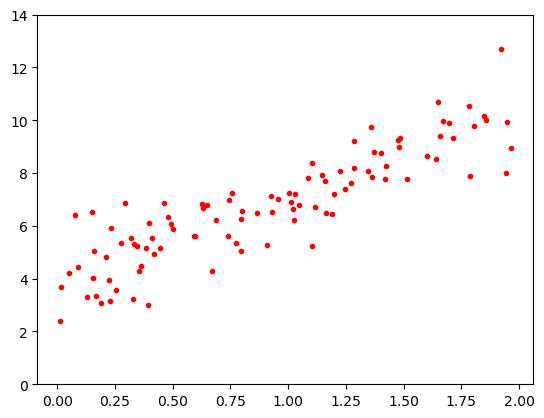

In [2]:
plt.plot(X, y, linewidth=0, marker='o', markersize=3, color="red")
plt.ylim([0, 14])
plt.show()

In [3]:
""" 정규방정식을 이용한  θ hat 산출 """

X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0=1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # = (bold XT dot bold X)inv dot XT dot y

theta_best

array([[3.84713306],
       [3.20801222]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84713306],
       [10.2631575 ]])

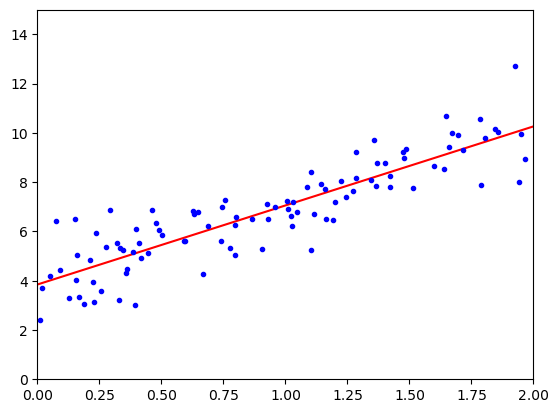

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # coef_: 가중치 ( = θ1, 2, 3, ...), intercept_: 편향 ( = θ0)

(array([3.84713306]), array([[3.20801222]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.84713306],
       [10.2631575 ]])

# 2. 경사 하강법 (Gradient Descent)

### 2.1 배치 경사 하강법

초기 theta: [ 0.05977152695979816, -0.8148065063950529 ]
0번째 그래디언트: [ -14.865745873525187, -16.007311667244505 ])
0번째 모델 파라미터: [ 1.546346114312317 - -1.4865745873525187, 0.7859246603293977 - -1.6007311667244506 ]


1번째 그래디언트: [ -8.991405209189177, -9.674888408660133 ])
1번째 모델 파라미터: [ 2.4454866352312346 - -0.8991405209189177, 1.753413501195411 - -0.9674888408660133 ]


2번째 그래디언트: [ -5.439631482394709, -5.846369211668077 ])
2번째 모델 파라미터: [ 2.9894497834707057 - -0.543963148239471, 2.338050422362219 - -0.5846369211668078 ]


3번째 그래디언트: [ -3.292099615991122, -3.5317225939704535 ])
3번째 모델 파라미터: [ 3.3186597450698176 - -0.3292099615991122, 2.6912226817592644 - -0.3531722593970454 ]


4번째 그래디언트: [ -1.9935844821566777, -2.1323695098723214 ])
4번째 모델 파라미터: [ 3.5180181932854855 - -0.19935844821566778, 2.9044596327464967 - -0.21323695098723217 ]


5번째 그래디언트: [ -1.2083934292029002, -1.286405471834169 ])
5번째 모델 파라미터: [ 3.6388575362057756 - -0.12083934292029003, 3.0331001799299138 - -0.12864054718341691 ]

93번째 그래디언트: [ -0.00047062629363338717, 0.0004365393052131487 ])
93번째 모델 파라미터: [ 3.8457041303839556 - -4.706262936333872e-05, 3.20933765158019 - 4.365393052131487e-05 ]


94번째 그래디언트: [ -0.0004556201364463775, 0.0004226200288759249 ])
94번째 모델 파라미터: [ 3.8457496923976002 - -4.556201364463775e-05, 3.2092953895773024 - 4.226200288759249e-05 ]


95번째 그래디언트: [ -0.0004410924581635634, 0.0004091445756993205 ])
95번째 모델 파라미터: [ 3.8457938016434166 - -4.410924581635634e-05, 3.2092544751197325 - 4.091445756993205e-05 ]


96번째 그래디언트: [ -0.00042702800224434515, 0.00039609879415569964 ])
96번째 모델 파라미터: [ 3.845836504443641 - -4.270280022443452e-05, 3.209214865240317 - 3.960987941556997e-05 ]


97번째 그래디언트: [ -0.00041341199860905675, 0.00038346898394901486 ])
97번째 모델 파라미터: [ 3.8458778456435017 - -4.134119986090568e-05, 3.209176518341922 - 3.834689839490149e-05 ]


98번째 그래디언트: [ -0.00040023014813009186, 0.00037124188162289894 ])
98번째 모델 파라미터: [ 3.8459178686583146 - -4.002301481300919e-05, 3.20913939415376 - 

198번째 그래디언트: [ -1.5666863006273956e-05, 1.4532127897702604e-05 ])
198번째 모델 파라미터: [ 3.8470854878845686 - -1.5666863006273956e-06, 3.2080563444120056 - 1.4532127897702605e-06 ]


199번째 그래디언트: [ -1.5167317162045891e-05, 1.4068763657000986e-05 ])
199번째 모델 파라미터: [ 3.847087004616285 - -1.5167317162045892e-06, 3.20805493753564 - 1.4068763657000987e-06 ]


200번째 그래디언트: [ -1.4683699589905786e-05, 1.3620174018937749e-05 ])
200번째 모델 파라미터: [ 3.847088472986244 - -1.4683699589905786e-06, 3.208053575518238 - 1.362017401893775e-06 ]


201번째 그래디언트: [ -1.4215502408827518e-05, 1.3185887887498306e-05 ])
201번째 모델 파라미터: [ 3.847089894536485 - -1.421550240882752e-06, 3.208052256929449 - 1.3185887887498308e-06 ]


202번째 그래디언트: [ -1.3762233930982859e-05, 1.2765449189280068e-05 ])
202번째 모델 파라미터: [ 3.847091270759878 - -1.376223393098286e-06, 3.20805098038453 - 1.2765449189280068e-06 ]


203번째 그래디언트: [ -1.332341814849869e-05, 1.2358416390613049e-05 ])
203번째 모델 파라미터: [ 3.8470926031016925 - -1.332341814849869e-06, 3

293번째 그래디언트: [ -7.211418162178518e-07, 6.689102425790851e-07 ])
293번째 모델 파라미터: [ 3.847130866401149 - -7.211418162178518e-08, 3.208014252615675 - 6.689102425790852e-08 ]


294번째 그래디언트: [ -6.981478451884016e-07, 6.475817011031641e-07 ])
294번째 모델 파라미터: [ 3.8471309362159336 - -6.981478451884016e-08, 3.208014187857505 - 6.475817011031642e-08 ]


295번째 그래디언트: [ -6.758870480183532e-07, 6.26933231724094e-07 ])
295번째 모델 파라미터: [ 3.8471310038046385 - -6.758870480183532e-08, 3.208014125164182 - 6.26933231724094e-08 ]


296번째 그래디언트: [ -6.543360479938088e-07, 6.069431489175074e-07 ])
296번째 모델 파라미터: [ 3.847131069238243 - -6.543360479938088e-08, 3.208014064469867 - 6.069431489175074e-08 ]


297번째 그래디언트: [ -6.334722125700409e-07, 5.875904598007096e-07 ])
297번째 모델 파라미터: [ 3.8471311325854645 - -6.33472212570041e-08, 3.208014005710821 - 5.875904598007096e-08 ]


298번째 그래디언트: [ -6.132736316466492e-07, 5.688548403637091e-07 ])
298번째 모델 파라미터: [ 3.8471311939128277 - -6.132736316466492e-08, 3.208013948825337 -

408번째 그래디언트: [ -1.7361761557310728e-08, 1.610426522800436e-08 ])
408번째 모델 파라미터: [ 3.8471330032331252 - -1.7361761557310728e-09, 3.208012270552286 - 1.610426522800436e-09 ]


409번째 그래디언트: [ -1.6808172809135157e-08, 1.5590772856049792e-08 ])
409번째 모델 파라미터: [ 3.8471330049139425 - -1.6808172809135158e-09, 3.2080122689932087 - 1.5590772856049794e-09 ]


410번째 그래디언트: [ -1.6272235470182752e-08, 1.5093653546534855e-08 ])
410번째 모델 파라미터: [ 3.847133006541166 - -1.6272235470182753e-09, 3.208012267483843 - 1.5093653546534856e-09 ]


411번째 그래디언트: [ -1.5753387021533172e-08, 1.4612384686564204e-08 ])
411번째 모델 파라미터: [ 3.8471330081165047 - -1.5753387021533173e-09, 3.2080122660226045 - 1.4612384686564205e-09 ]


412번째 그래디언트: [ -1.525108299205158e-08, 1.4146460530966877e-08 ])
412번째 모델 파라미터: [ 3.847133009641613 - -1.5251082992051582e-09, 3.2080122646079583 - 1.4146460530966878e-09 ]


413번째 그래디언트: [ -1.476479392081842e-08, 1.3695394111476594e-08 ])
413번째 모델 파라미터: [ 3.8471330111180926 - -1.476479392081842e

513번째 그래디언트: [ -5.77961252190562e-10, 5.361030372416444e-10 ])
513번째 모델 파라미터: [ 3.8471330541924504 - -5.7796125219056195e-11, 3.2080122232838937 - 5.361030372416444e-11 ]


514번째 그래디언트: [ -5.595338237185387e-10, 5.190078389925302e-10 ])
514번째 모델 파라미터: [ 3.847133054248404 - -5.5953382371853873e-11, 3.208012223231993 - 5.190078389925303e-11 ]


515번째 그래디언트: [ -5.416925930035177e-10, 5.024593112114629e-10 ])
515번째 모델 파라미터: [ 3.847133054302573 - -5.416925930035177e-11, 3.208012223181747 - 5.02459311211463e-11 ]


516번째 그래디언트: [ -5.244210754540291e-10, 4.864373795903691e-10 ])
516번째 모델 파라미터: [ 3.847133054355015 - -5.244210754540291e-11, 3.208012223133103 - 4.8643737959036916e-11 ]


517번째 그래디언트: [ -5.076995179820187e-10, 4.709272131988267e-10 ])
517번째 모델 파라미터: [ 3.847133054405785 - -5.076995179820187e-11, 3.2080122230860106 - 4.709272131988267e-11 ]


518번째 그래디언트: [ -4.915109386161021e-10, 4.5591190302850216e-10 ])
518번째 모델 파라미터: [ 3.847133054454936 - -4.9151093861610206e-11, 3.208012223040

629번째 그래디언트: [ -1.347117972727574e-11, 1.2494895712469036e-11 ])
629번째 모델 파라미터: [ 3.847133055906372 - -1.3471179727275742e-12, 3.2080122216941094 - 1.2494895712469038e-12 ]


630번째 그래디언트: [ -1.304215402342379e-11, 1.2096242939078733e-11 ])
630번째 모델 파라미터: [ 3.847133055907676 - -1.3042154023423792e-12, 3.2080122216928997 - 1.2096242939078733e-12 ]


631번째 그래디언트: [ -1.26259891430891e-11, 1.1710713994377966e-11 ])
631번째 모델 파라미터: [ 3.8471330559089387 - -1.2625989143089102e-12, 3.2080122216917286 - 1.1710713994377967e-12 ]


632번째 그래디언트: [ -1.2223555501122974e-11, 1.1337251408901251e-11 ])
632번째 모델 파라미터: [ 3.8471330559101613 - -1.2223555501122974e-12, 3.208012221690595 - 1.1337251408901253e-12 ]


633번째 그래디언트: [ -1.1833076740686011e-11, 1.0976378688735639e-11 ])
633번째 모델 파라미터: [ 3.847133055911345 - -1.183307674068601e-12, 3.208012221689497 - 1.097637868873564e-12 ]


634번째 그래디언트: [ -1.145574302086061e-11, 1.062639993228007e-11 ])
634번째 모델 파라미터: [ 3.8471330559124906 - -1.145574302086061e-12, 

779번째 그래디언트: [ -1.0473399925103877e-13, 9.669841927996708e-14 ])
779번째 모델 파라미터: [ 3.847133055946956 - -1.0473399925103878e-14, 3.2080122216564653 - 9.66984192799671e-15 ]


780번째 그래디언트: [ -1.0109246773026826e-13, 9.37611365399087e-14 ])
780번째 모델 파라미터: [ 3.847133055946966 - -1.0109246773026827e-14, 3.208012221656456 - 9.37611365399087e-15 ]


781번째 그래디언트: [ -9.734435479913373e-14, 9.137147130674667e-14 ])
781번째 모델 파라미터: [ 3.847133055946976 - -9.734435479913373e-15, 3.2080122216564466 - 9.137147130674667e-15 ]


782번째 그래디언트: [ -9.476863738200336e-14, 8.786575437808021e-14 ])
782번째 모델 파라미터: [ 3.847133055946985 - -9.476863738200338e-15, 3.2080122216564377 - 8.786575437808022e-15 ]


783번째 그래디언트: [ -9.228173780684302e-14, 8.441027504127802e-14 ])
783번째 모델 파라미터: [ 3.8471330559469945 - -9.228173780684302e-15, 3.2080122216564293 - 8.441027504127803e-15 ]


784번째 그래디언트: [ -8.887113267519453e-14, 8.228401022070831e-14 ])
784번째 모델 파라미터: [ 3.8471330559470034 - -8.887113267519453e-15, 3.20801222165

897번째 그래디언트: [ -2.5934809855243656e-15, 1.7800186725423633e-15 ])
897번째 모델 파라미터: [ 3.8471330559472663 - -2.5934809855243655e-16, 3.2080122216561775 - 1.7800186725423634e-16 ]


898번째 그래디언트: [ -1.6697754290362355e-15, 2.545535413490133e-15 ])
898번째 모델 파라미터: [ 3.8471330559472663 - -1.6697754290362357e-16, 3.208012221656177 - 2.545535413490133e-16 ]


899번째 그래디언트: [ -2.6290081223123707e-15, 1.4069837362683106e-15 ])
899번째 모델 파라미터: [ 3.8471330559472667 - -2.6290081223123706e-16, 3.208012221656177 - 1.4069837362683107e-16 ]


900번째 그래디언트: [ -1.723066134218243e-15, 2.1947049377085833e-15 ])
900번째 모델 파라미터: [ 3.8471330559472667 - -1.723066134218243e-16, 3.208012221656177 - 2.1947049377085835e-16 ]


901번째 그래디언트: [ -1.723066134218243e-15, 2.1947049377085833e-15 ])
901번째 모델 파라미터: [ 3.8471330559472667 - -1.723066134218243e-16, 3.208012221656177 - 2.1947049377085835e-16 ]


902번째 그래디언트: [ -1.723066134218243e-15, 2.1947049377085833e-15 ])
902번째 모델 파라미터: [ 3.8471330559472667 - -1.723066134218243e-16

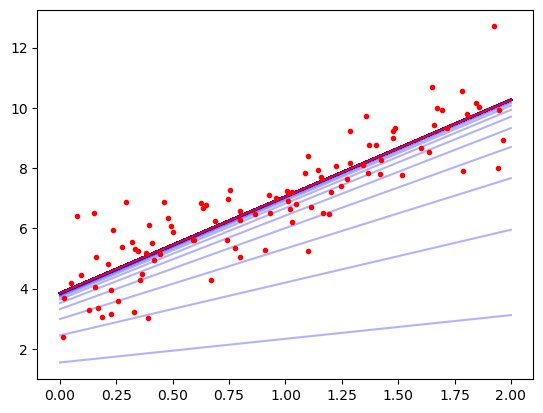

In [8]:
""" 예시 """

eta = 0.1
n_iterations = 1000
m = 100

theta_batch = []

theta = np.random.randn(2, 1) # 무작위 초기화

print("초기 theta: [ {}, {} ]".format(theta[0, 0], theta[1, 0]))

for itereration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    print(
        "{}번째 그래디언트: [ {}, {} ])\n{}번째 모델 파라미터: [ {} - {}, {} - {} ]\n\n".format(
            itereration, gradients[0, 0], gradients[1, 0],
            itereration, theta[0, 0], (eta * gradients)[0, 0], theta[1, 0], (eta * gradients)[1, 0], 
        )
    )
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    theta_batch.append([t0, t1])
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)
    
plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

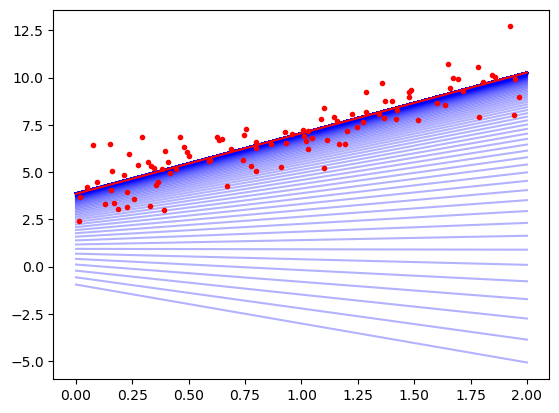

In [9]:
""" 예시2. eta = 0.02 """

eta = 0.02
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for itereration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)

plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

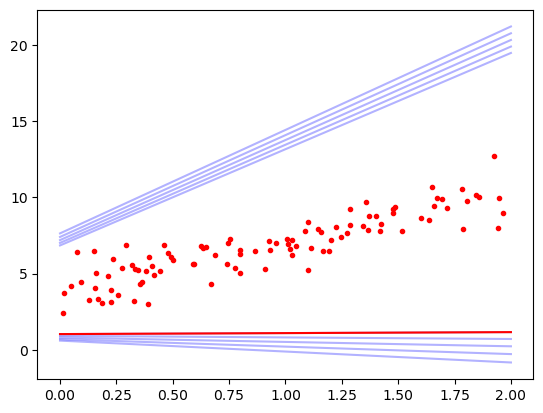

In [10]:
""" 예시3. eta = 0.5 """

eta = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # 무작위 초기화

for itereration in range(10):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    t0 = theta[0, 0]
    t1 = theta[1, 0]
    plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "b-", alpha=0.3)

plt.plot([[0], [2]], [[t0], [t0 + 2 * t1]], "r-")
plt.plot(X, y, "r.")
plt.show()

### 확률적 경사 하강법

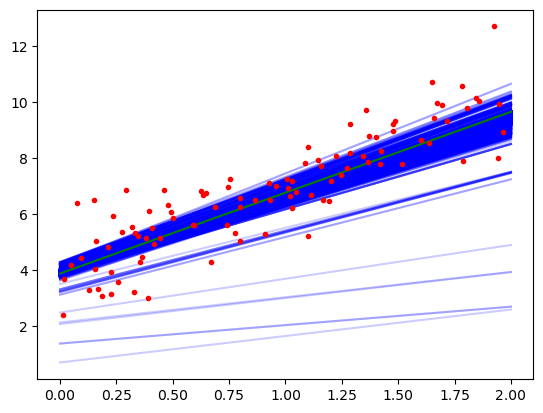

In [11]:
n_epochs = 50
t0, t1 = 5, 50
tx, ty = 0, 0

def learning_schedule(t): return t0 / (t + t1)

theta = np.random.randn(2, 1)

theta_sgd = []

for epoch in range(n_epochs):
    for i in range(X_b.size):
        random_index = np.random.randint(X_b.size)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * X_b.size + i)
        theta = theta - eta * gradients
        tx = theta[0, 0]
        ty = theta[1, 0]
        theta_sgd.append([tx, ty])
        plt.plot([[0], [2]], [[tx], [ty + 2 * ty]], "b-", alpha=0.2)

plt.plot([[0], [2]], [[tx], [ty + 2 * ty]], "g-")
plt.plot(X, y, "r.")
plt.show()

In [12]:
tx

3.8827692097308493

In [13]:
ty

3.2183290000653684

In [14]:
theta

array([[3.88276921],
       [3.218329  ]])

In [15]:
""" 위 작업의 sklearn 방법 """

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91152651]), array([3.29167567]))

### 미니배치 경사 하강법

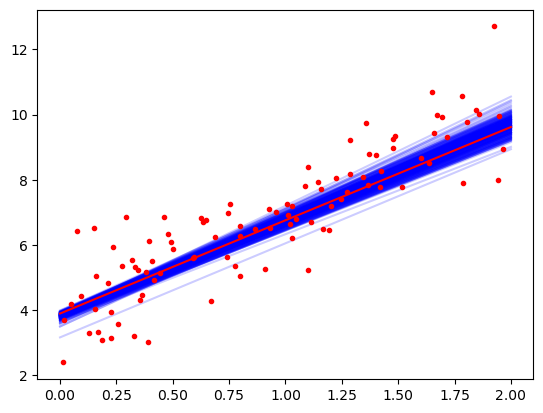

In [17]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        plt.plot([[0], [2]], [[theta[0, 0]], [theta[1, 0] + 2 * theta[1, 0]]], "b-", alpha=0.2)

plt.plot([[0], [2]], [[theta[0, 0]], [theta[1, 0] + 2 * theta[1, 0]]], "r-")
plt.plot(X, y, "r.")
plt.show()

In [18]:
theta_batch = np.array(theta_batch)
theta_sgd = np.array(theta_sgd)
theta_path_mgd = np.array(theta_path_mgd)

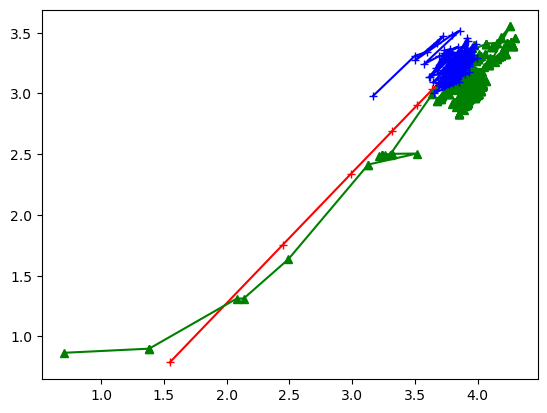

In [19]:
plt.plot(theta_batch[ : , 0], theta_batch[ : , 1], "r-+")
plt.plot(theta_sgd[ : , 0], theta_sgd[ : , 1], "g-^")
plt.plot(theta_path_mgd[ : , 0], theta_path_mgd[ : , 1], "b-+")

# 다항 회귀

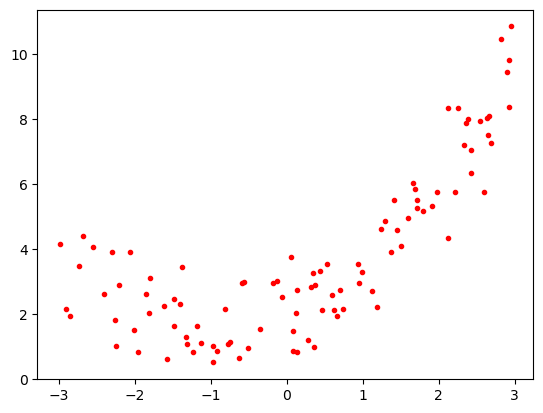

In [20]:
m = 100
X=  6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "r.")

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.38942838]), array([2.38942838, 5.709368  ]))

In [22]:
"""
    예측 결과: y hat = 0.48x^2 + 1.03x + 1.98
    >>> 1.98 + 1.03x + 0.48x^2
    >>> coef_[0] >>> 1차항 계수, coef_[1] >>> 2차항 계수
"""

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [23]:
""" 3차로 테스트 """

Xt = np.random.randn(100, 2)
yt = 0.5 * Xt ** 3 + Xt + 2 + np.random.randn(100, 2)

In [24]:
"""
    특성: 2개
    차수: 3차
    >>> (2 + 3) ! / 2!3! = 10 (상수항 1개 + 나머지 조합 9개?)
"""

pf2 = PolynomialFeatures(degree=3, include_bias=False)
X_poly2 = pf2.fit_transform(Xt)
X_poly2

array([[ 1.01857330e+00,  2.91144308e-01,  1.03749157e+00,
         2.96551820e-01,  8.47650082e-02,  1.05676122e+00,
         3.02059767e-01,  8.63393744e-02,  2.46788497e-02],
       [-4.16151856e-01,  4.10849204e-01,  1.73182367e-01,
        -1.70975659e-01,  1.68797069e-01, -7.20701635e-02,
         7.11518378e-02, -7.02452134e-02,  6.93501414e-02],
       [-1.03019402e+00, -3.81406880e-02,  1.06129972e+00,
         3.92923087e-02,  1.45471208e-03, -1.09334462e+00,
        -4.04787015e-02, -1.49863569e-03, -5.54837197e-05],
       [ 3.19401234e-01,  1.29317598e-01,  1.02017148e-01,
         4.13042004e-02,  1.67230412e-02,  3.25844029e-02,
         1.31926126e-02,  5.34135999e-03,  2.16258352e-03],
       [ 4.15065095e-01, -6.44046016e-01,  1.72279033e-01,
        -2.67321021e-01,  4.14795270e-01,  7.15070132e-02,
        -1.10955625e-01,  1.72167038e-01, -2.67147241e-01],
       [ 1.15203140e+00,  1.82216895e+00,  1.32717635e+00,
         2.09919585e+00,  3.32029968e+00,  1.528948

In [25]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y)
lin_reg2.intercept_, lin_reg2.coef_

(array([4.1877883]),
 array([[ 0.92040662, -0.06916481, -0.49623423, -0.15190004,  0.07038048,
         -0.13065532, -0.19192795, -0.32341724,  0.1307819 ]]))

# 학습 곡선

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # 훈련 / 테스트셋 분할
    # 분할 결과: 0.8X, 0.2X, 0.8y, 0.2y
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[ : m], y_train[ : m]) # 서브셋 생성  및 이를 이용한 모델 생성
        y_train_predict = model.predict(X_train[ : m]) # 훈련셋을 이용해 예측
        y_val_predict = model.predict(X_val) # 검증셋을 이용해 예측한 결과: 실제
        train_errors.append(mean_squared_error(y_train[ : m], y_train_predict)) # 훈련셋의 (y hat - y)^2 (MSE) 측정
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # 검증셋의 MSE 측정
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="validation")
    
    plt.legend()
    
    plt.xlabel("sizeof train set")
    plt.ylabel("RMSE")

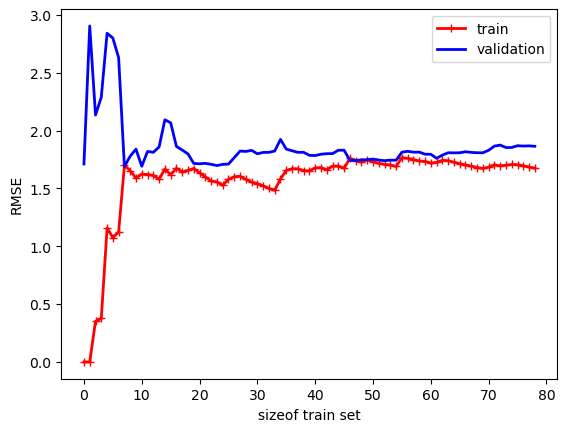

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [28]:
x1, y1 = train_test_split(np.random.randn(10), test_size=0.2)
x1

array([ 1.06394099,  1.10132296,  0.41820576,  0.42584366, -1.77601175,
       -0.60735443,  0.25256885,  0.44419833])

In [29]:
y1

array([-0.07722105,  1.38453205])

In [30]:
x1, x2, y1, y2 = train_test_split(np.random.randn(10), np.random.randint(0, 10, size=(10)), test_size=0.2)

In [31]:
x1, x2

(array([-0.40911661,  0.91509474, -0.68895841,  0.43414222,  1.43287243,
        -1.44272672,  0.42713373,  0.15710869]),
 array([ 1.23221396, -0.0185046 ]))

In [32]:
y1, y2

(array([2, 5, 5, 9, 7, 7, 2, 2]), array([2, 2]))

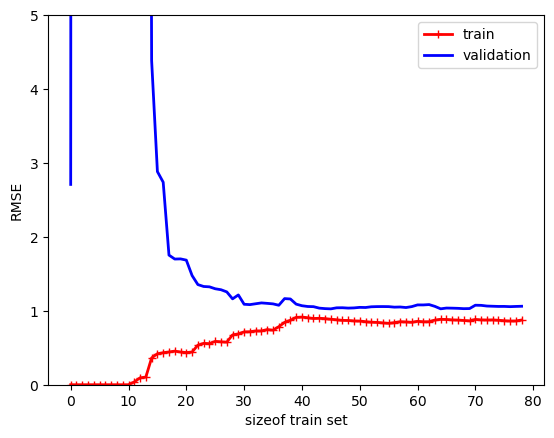

In [33]:
""" 같은 데이터를 10차 다항 회귀 모델로 일반화 """

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

plt.ylim([0, 5])

plt.show()

# 규제가 있는 선형 모델

### 릿지 회귀 (티호노프 규제)

In [34]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [35]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([4.41522811])

### 라쏘 회귀

In [36]:
""" 라쏘 회귀 예시 """

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09481859])

### 엘라스틱넷

In [37]:
""" 엘라스틱넷 예시 """

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # >>> 반반씩 채택
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

### 조기 종료

In [38]:
""" 조기 종료 구현 """

"""
    *** 실행하면 오류 발생할 것 
    >>> 훈련셋, 검증셋 분할 후 진행 필요
"""

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("pol_feats", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # 훈련셋을 다항 회귀에 적합한 형태로 변형 + 스케일링
X_val_poly_scaled = poly_scaler.transform(X_val) # 검증셋도 변형 + 스케일링

sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimim_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 1. 훈련셋으로 모델 구축
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # 2. 1에서 생성한 모델로 검증셋 예측
    val_error = mean_squared_error(y_val, y_val_predict) # 3. 원본과 검증셋으로 예측한 수치의 MSE 산출
    if val_error < minimim_val_error: # 4.1 새 MSE < 기존 MSE일 경우
        minimim_val_error = val_error # 4.2 가장 작은 MSE = 새 MSE
        best_epoch = epoch # 최선의 에포크 = 현재 에포크
        best_model = clone(sgd_reg) # 최선의 모델 = 현재 모델

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rksla\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [39]:
best_epoch

86

In [40]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)

# 로지스틱 회귀

In [41]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [43]:
X = iris["data"][ : , 3 : ]
y = (iris["target"] == 2).astype(np.int8)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [46]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

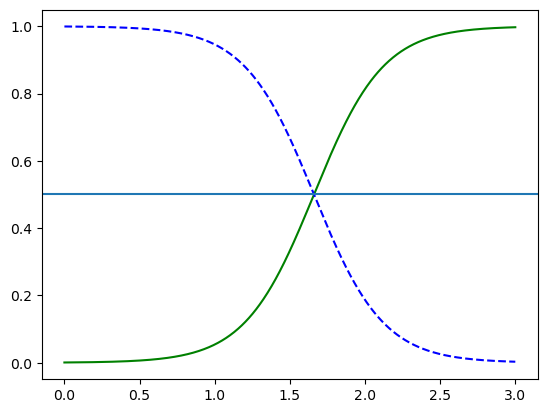

In [47]:
plt.plot(X_new, y_proba[ : , [1]], "g-", label="Iris-virginica")
plt.plot(X_new, y_proba[ : , [0]], "b--", label="not Iris-virginica")
plt.axhline(0.5)
plt.show()

In [48]:
log_reg.predict([[1.7], [1.5]])

array([1, 0], dtype=int8)

In [49]:
log_reg.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

### 소프트맥스 회귀

In [71]:
X = iris["data"][ : , (2, 3)]
y = iris["target"]

In [72]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [73]:
softmax_reg.predict([[5, 2]])

array([2])

In [74]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])